<a href="https://colab.research.google.com/github/erdemsirel/data_science_case/blob/main/DataScienceCaseThalia_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

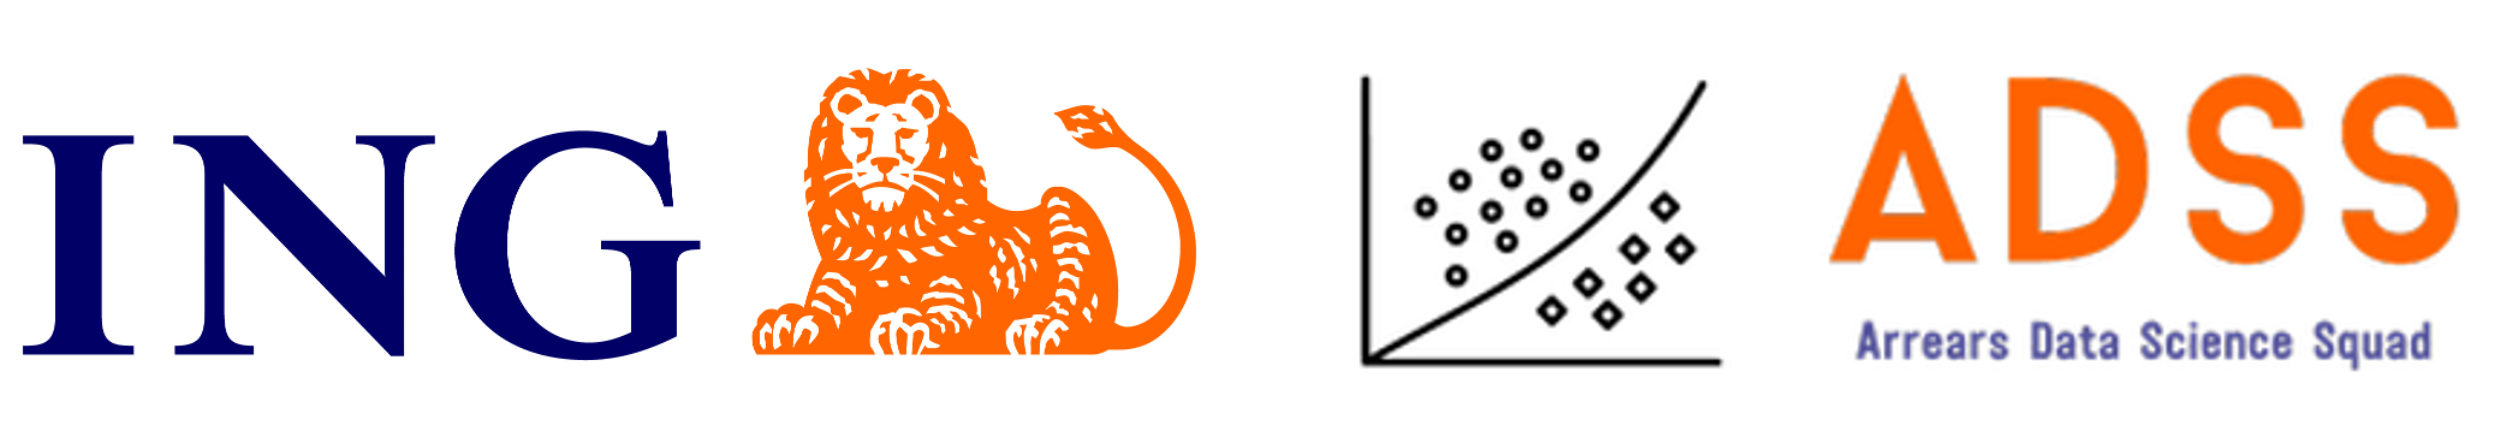

# Description

## Welcome to the case!  
**Are you up for a challenge where you will identify customers who experience financial difficulties via Machine Learning? Are you curious about how we do Data Science in ING?**  

In ING Collections, we are here to help customers when they experience financial difficulties. In this challenge, we will try to identify the risky loans and the customers with financial problems.
First, we will build a baseline machine learning model together, and you will have a chance to see our way of working and the basics of data science & machine learning.  
In the second part of the case, you will try to improve the baseline model by exploring some modeling techniques we use on a day-to-day basis.

## Aim
* We are trying to predict if a customer will be able to pay their debt within 30 days after the due date.
* Developing a model that can predict test data the best and (most importantly) help greatest number of customers with lowest cost possible.
* In the test data there are 8148 customers, 1812 of which are having financial issues. We need to identify those customers and help them!
* You can only help 2000 of them with the existing capacity. 
* If you predict more than 2000 positive cases, each 75 predicted positive case will cost you €13000.
* Each positive case that you failed to identify will cost you €500.
* If you fail to identify at least 500 positive case correctly, you will get a €500000 fine!
* Please keep that in mind, if you have higher than 0.05 overfit between your train and test data, your solution is invalid.

*Credit For Data Source:* 
`https://www.kaggle.com/datasets/laotse/credit-risk-dataset`

# Prepare Environment

In [1]:
# Download the utility functions python module 
! wget -O utility_functions.py https://raw.githubusercontent.com/erdemsirel/data_science_case/main/utility_functions.py 

# With this fucntion you can quickle see your model's performance
from utility_functions import classification_results

# This is a wrapper function to use classification_results function for test dataset.
from utility_functions import classification_results_test

# This is a wrapper function to evaluate train, validation & test dats all together. 
# Here we also calculate overfit.
from utility_functions import classification_results_combined

--2022-10-05 11:34:23--  https://raw.githubusercontent.com/erdemsirel/data_science_case/main/utility_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4405 (4.3K) [text/plain]
Saving to: ‘utility_functions.py’

utility_functions.p 100%[===================>]   4.30K  --.-KB/s    in 0s      

2022-10-05 11:34:23 (33.8 MB/s) - ‘utility_functions.py’ saved [4405/4405]



In [ ]:
#@title Imports { display-mode: "form" }
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
np.random.seed(32)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,  MaxAbsScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier

import math

# Prepare Dummy Due Date and Paid Date
TODO: Delete in student version

In [ ]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_dataset.csv")

In [ ]:
data_raw.head()

In [ ]:
# # TODO: Delete in student version

# data = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_dataset.csv")
# np.random.seed(0)
# def add_duedate_and_pay_date(row):
#     if row['loan_status'] == 1:
#         row['paid_date'] = row['due_date'] + pd.to_timedelta(np.random.randint(31,31*3), unit='D')
#     else:
#         row['paid_date'] = row['due_date'] + pd.to_timedelta(np.random.randint(0,29), unit='D')
#     # Convert to string
#     row['due_date'] = row['due_date'].strftime('%Y-%m-%d')
#     row['paid_date'] = row['paid_date'].strftime('%Y%m%d')
#     return row
# data['due_date'] = data['loan_status'].apply(lambda x: pd.to_datetime('2021-06-01') + pd.to_timedelta(np.random.randint(0,365), unit='D'))
# data = data.apply(add_duedate_and_pay_date, axis=1)
# data.loc[(data['loan_status'] == 1) & (data.index < 100), 'paid_date'] = pd.NaT

# # Add label -1 cases
# indeterminate = data.sample(n=138).copy()
# indeterminate['loan_status'] = -1 
# indeterminate['due_date'] = indeterminate['due_date'].apply(lambda x: (pd.to_datetime('2022-10-07') - pd.to_timedelta(np.random.randint(0,28), unit='D')).strftime('%Y-%m-%d'))
# indeterminate['paid_date'] = None
# print(data.shape)
# data = pd.concat([data, indeterminate], axis='index').sample(frac=1).reset_index(drop=True)

# data["loan_int_amnt"] = (data["loan_int_rate"] * data["loan_amnt"]) / 100
# data = data.drop(columns=['loan_percent_income', 'loan_int_rate'])

# print(data.shape)

# data_to_be_saved = data.copy()
# data_to_be_saved_dev, data_to_be_saved_test = train_test_split(data_to_be_saved, test_size=0.25, random_state=32)

# data_to_be_saved_dev.reset_index(drop=True).drop(columns=["loan_status"]).to_csv("credit_risk_development_dataset.csv", index=True)

# data_to_be_saved_test = data_to_be_saved_test.reset_index(drop=True).rename(columns={'loan_status':'label'})
# data_to_be_saved_test = data_to_be_saved_test[data_to_be_saved_test['label'] >= 0]
# data_to_be_saved_test['due_date'] = '2022-10-01'
# data_to_be_saved_test.drop(columns=['label', 'paid_date']).to_csv("credit_risk_test_dataset.csv", index=True)
# data_to_be_saved_test[['label']].to_csv("credit_risk_test_label.csv", index=True)

# Load the Data

In [ ]:
# This CSV consists your development data. It contains features and labels.
data_orj = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_development_dataset.csv").drop(columns=['Unnamed: 0'])
data_orj.head(1)

In [ ]:
# This CSV consists your test data. It contains only features. You cannot use this data for training.

x_test_orj = pd.read_csv("https://raw.githubusercontent.com/erdemsirel/data_science_case/main/credit_risk_test_dataset.csv").drop(columns=['Unnamed: 0'])
x_test_orj = x_test_orj.drop(columns=['due_date'])

x_test_orj.head(1)

# Exploratory Data Analysis
In this section, we will inspect the data and check the missing values. You can further analyse the data to understand it more.

In [ ]:
# We will copy data from the original dataframe because we don't want to overwrite the original df.

data = data_orj.copy()
x_test = x_test_orj.copy()

In [ ]:
data.describe()

In [ ]:
data.isnull().mean().rename("# of Missing Values")

In [ ]:
x_test.isnull().mean().rename("# of Missing Values")

# Data Processing

## Building the label

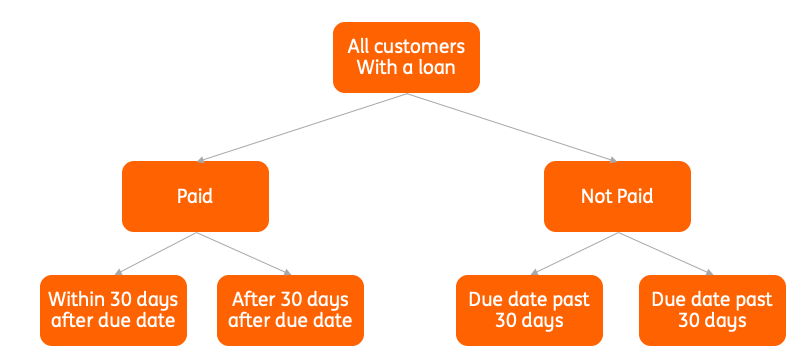

In [ ]:
# We will copy data from the original data frame because we don't want to overwrite the original df.
data = data_orj.copy()

In [ ]:
# To be able to calculates differences between dates we parse them into date format.
data['due_date'] = pd.to_datetime(data['due_date'], format='%Y-%m-%d')
data['paid_date'] = pd.to_datetime(data['paid_date'], format='%Y%m%d')

In [ ]:
# Boolean mask: If the customer paid or not
mask_paid = (~data['paid_date'].isna())

# Boolean mask: If customers paid after more than 30 days after due_date
mask_paid_date_30_days_past_due_date = (data['paid_date'] - data['due_date']).dt.days > 30
# Boolean mask: If more than 30 days past the due date
mask_current_date_30_days_past_due_date = (pd.to_datetime('2022-10-07') - data['due_date']).dt.days > 30

# LABEL 1: Paid but after 30 days after due date
data.loc[mask_paid & mask_paid_date_30_days_past_due_date, "label"] = 1

# LABEL 0: Paid within 30 days
data.loc[mask_paid & (~mask_paid_date_30_days_past_due_date), "label"] = 0

# LABEL 1: Not paid and 30 days past the due date
data.loc[(~mask_paid) & (mask_current_date_30_days_past_due_date), "label"] = 1

# Indeterminate: Not paid but still within 30 days period
data.loc[(~mask_paid) & (~mask_current_date_30_days_past_due_date), "label"] = -1

# Filter out indeterminate
data = data[data["label"] >= 0]


In [ ]:
data = data.drop(columns=['due_date', 'paid_date'])
data_with_label_orj = data.copy()

In [ ]:
class_ratio = data.label.value_counts(normalize=True)
class_ratio.plot(kind='bar')
print("Postive Class Ratio", class_ratio[1].round(3))

# Building the Baseline Model
Here in this part we will establish the baseline model and from there we will try to improve it.

In [ ]:
sns.pairplot(data, hue='label')

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()
data.head(1)

In [ ]:
# We cannot feed models with categorical data, we need to create numerical representation for them
# In this section we will create binary representation for each value of a categorical feature.
data = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"])
x_test = pd.get_dummies(x_test, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"])

data.head(1).T

In [ ]:
# Drop NA for development data
print("Number of rows before NA removal:", data.shape[0])
data = data.dropna()
print("Number of rows after NA removal:", data.shape[0])

# Drop NA for test data
print("Number of rows before NA removal (test):", x_test.shape[0])
x_test = x_test.dropna()
print("Number of rows after NA removal (test):", x_test.shape[0])

In [ ]:
x = data.drop(columns='label')
y = data['label']

# Split the data into two subset, so we can use one subset to train the model 
# and other subset to test the model's performance
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

In [ ]:
model = RandomForestClassifier(random_state=32)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
classification_results(y_val, model.predict_proba(x_val)[:,1], name="validation")

In [ ]:
# classification_results_test(y_pred_proba=model.predict_proba(x_test)[:,1])

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index = x_train.columns.tolist()).sort_values(ascending=False)
feat_imp

# Improving the Baseline Model
In this section we will slightly modify the initial model to make the model pipeline more flexible so you can experiment easily.

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

x = data.drop(columns='label')
y = data['label']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

In [ ]:
x_train.head()

In [ ]:
model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
model_pipeline.fit(x_train, y_train)
print("")

In [ ]:
classification_results(y_val, model_pipeline.predict_proba(x_val)[:,1], name="validation")

In [ ]:
classification_results_test(y_pred_proba=model_pipeline.predict_proba(x_test)[:,1], threshold=0.5)

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

# Possible Improvement Options
Not necesseraly all of them improve your model's performance. Due to time constraints, you need to choose the ones you believe will improve your model.

## Outlier Handling
In this section you can try to identify outlier values in your features, and treat them to prevent them to mislead your model.

In [ ]:
stats = x_train.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['lower_threshold'] = stats['25%'] - stats['IQR'] * 1.5
stats['upper_threshold'] = stats['75%'] + stats['IQR'] * 1.5

feat_imp_order = [feat for feat in feat_imp.index if feat in stats.index]
stats.loc[feat_imp_order].loc[stats['max']>1]

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9*3, 4*3))
fig.subplots_adjust(hspace=0.5)
axes = (ax for ax in axes.flat)
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].nunique()==2: continue
    ax_ = sns.boxplot(data=data, x=col, ax=next(axes))
    ax_.set_title(col)
plt.show()

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
# [Solution Placeholder]
# Implement you outlier handling here. You can only modify train data.

In [ ]:
# [Answer]
# TODO: Delete in student version

# Cap person_age above 85
# Cap person_income above 140000
# Cap person_emp_length above 20

x_train['person_age'] = x_train['person_age'].mask(x_train['person_age'] >= 85, 85)
x_train['person_income'] = x_train['person_income'].mask(x_train['person_income'] >= 140000, 140000)
x_train['person_emp_length'] = x_train['person_emp_length'].mask(x_train['person_emp_length'] >= 20, 20)

In [ ]:
model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
model_pipeline.fit(x_train, y_train)
print("")

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

## Feature Engineering
In this section, you can develop new features and test them if they improve your model's performance.

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

In [ ]:
# [Solution Placeholder]
# Create your features here for both data and x_test dataframe.

In [ ]:
# [Answer]
# TODO: Delete in student version

data['loan_int_rate'] = data['loan_int_amnt'] / data['loan_amnt']
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

x_test['loan_int_rate'] = x_test['loan_int_amnt'] / x_test['loan_amnt']
x_test['loan_to_income_ratio'] = x_test['loan_amnt'] / x_test['person_income']


In [ ]:
x = data.drop(columns='label')
y = data['label']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
model_pipeline.fit(x_train, y_train)
print("")

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

## Correlated Feature Removal

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
col_order = data.columns.tolist()
# to move label rightmost side, first remove from the list 
# and add it back to at the end of the list
col_order.remove('label')
col_order.append('label')

correlations = data[col_order].corr().abs().round(2)
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True,linewidths=.5, center=1)

In [ ]:
# [Solution Placeholder]
# List the columns that you want to drop
columns_to_drop = []

In [ ]:
# [Answer]
# TODO: Delete in student version
columns_to_drop = ["loan_amnt", "cb_person_cred_hist_length"]

In [ ]:
data = data.drop(columns=columns_to_drop)
x_test = x_test.drop(columns=columns_to_drop)

In [ ]:
x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
model_pipeline.fit(x_train, y_train)

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

## Handling Missing Data

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
# [Solution Placeholder]

model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# You can modify the numeric_transformer below to change how you handle missing values in numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
# You can modify the categorical_transformer below to change how you handle missing values in categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
# [Answer]
# TODO: Delete in student version

model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
model_pipeline.fit(x_train, y_train)
print("model fitted")

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

## Preprocessing
There various ways to preprocess categorical data. In this section you can try different ways. One of the ways of handling caterical features other than one-hot encoding is creating ordinal representation.

### OrdinalEncoder 

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)
display(train_data.groupby(['person_home_ownership'])['label'].mean().sort_values())
display(train_data.groupby(['loan_grade'])['label'].mean().sort_values())

In [ ]:
person_home_ownership_order = train_data.groupby(['person_home_ownership'])['label'].mean().sort_values().index.tolist()
loan_grade_order = train_data.groupby(['loan_grade'])['label'].mean().sort_values().index.tolist()

In [ ]:
# [Solution Placeholder]
# Modify the pipeline below to implement ordinal encoder for some of the categorical features
model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
# [Answer]
# TODO: Delete in student version
model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
ordinal_features = ['person_home_ownership', 'loan_grade']
categorical_features = list(set(x_train.select_dtypes(include=['object']).columns) - set(ordinal_features))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=[person_home_ownership_order, loan_grade_order]))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
        ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
model_pipeline.fit(x_train, y_train)
print("model fitted")

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

## Hyper-parameter Optimisation
Up to now we used default parameters for our RandomForestClassifier model. You can improve your model by performing hyper-parameter tuning. You need to remember the time is limited so you cannot try a lot of different parameters, so you need to create your search space wisely. Also you need to have a overfit less than 0.05.

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
# [Solution Placeholder]
# You can modify the the pipeline to incorporate other improvements (optional)
model = RandomForestClassifier(random_state=32)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
# [Answer]
# TODO: Delete in student version
model = RandomForestClassifier(random_state=32)

train_data = pd.concat([x_train, y_train], axis=1)
person_home_ownership_order = train_data.groupby(['person_home_ownership'])['label'].mean().sort_values().index.tolist()
loan_grade_order = train_data.groupby(['loan_grade'])['label'].mean().sort_values().index.tolist()

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
ordinal_features = ['person_home_ownership', 'loan_grade']
categorical_features = list(set(x_train.select_dtypes(include=['object']).columns) - set(ordinal_features))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=[person_home_ownership_order, loan_grade_order]))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
        ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])

In [ ]:
# [Solution Placeholder]
# Add hyper-paramter tuning code here

In [ ]:
# [Answer]
# TODO: Delete in student version

param_grid = { 
    'classifier__n_estimators': [100, 200, 400, 1000],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_depth' : [5, 10, 20, 40, 50, None],
    'classifier__criterion' :['gini', 'entropy']
}



model_pipeline = RandomizedSearchCV(model_pipeline, 
                    param_distributions = param_grid,
                    n_iter=50,
                    cv = 3,  
                    scoring = 'roc_auc', 
                    verbose = 100, 
                    n_jobs = 1, 
                    random_state=32
                    )

In [ ]:
model_pipeline.fit(x_train, y_train)

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

In [ ]:
# [Answer]
# TODO: Delete in student version

threshold_results = pd.concat([classification_results_test(y_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=threshold, 
                                name=threshold)
            for threshold in np.linspace(0, 1, 9)
            ])
display(threshold_results.sort_values("Cost"))
threshold_results["Cost"].plot()
print("")

## Model Selection

In [ ]:
# Set data & x_test from originals because they might be modified in the previous sections
data = data_with_label_orj.copy()
x_test = x_test_orj.copy()

data['loan_int_rate'] = data['loan_int_amnt'] / data['loan_amnt']
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

x_test['loan_int_rate'] = x_test['loan_int_amnt'] / x_test['loan_amnt']
x_test['loan_to_income_ratio'] = x_test['loan_amnt'] / x_test['person_income']

columns_to_drop = ["loan_amnt", "cb_person_cred_hist_length"]
data = data.drop(columns=columns_to_drop)
x_test = x_test.drop(columns=columns_to_drop)

x = data.drop(columns='label')
y = data['label']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.33, random_state=32)

In [ ]:
# [Solution Placeholder]
# Implement a model pipeline that use models other than RandomForestClassifier

# You can change model type below
model = RandomForestClassifier(random_state=32)

# You can also modify the rest of the pipeline to incorporate other improvements
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])



In [ ]:
# [Answer]
# TODO: Delete in student version

model = LGBMClassifier(random_state=32)

train_data = pd.concat([x_train, y_train], axis=1)
person_home_ownership_order = train_data.groupby(['person_home_ownership'])['label'].mean().sort_values().index.tolist()
loan_grade_order = train_data.groupby(['loan_grade'])['label'].mean().sort_values().index.tolist()

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
ordinal_features = ['person_home_ownership', 'loan_grade']
categorical_features = list(set(x_train.select_dtypes(include=['object']).columns) - set(ordinal_features))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=[person_home_ownership_order, loan_grade_order]))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
        ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])

In [ ]:
model_pipeline.fit(x_train, y_train)
print("")

In [ ]:
classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5)

# Optimising the model based on capacity and cost
Your success depends not purely on model performance but also on how you finetune it based on your business case.
In this section, you can calibrate your threshold based on the information given in the section.

In [ ]:
# [Answer]
# TODO: Delete in student version

threshold_results = pd.concat([classification_results_test(y_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=threshold, 
                                name=threshold)
            for threshold in np.linspace(0, 1, 9)
            ])
display(threshold_results.sort_values("Cost"))
threshold_results["Cost"].plot()

# Eliminating Overfit
In practice we don't want a high overfit because that often leads to unreliable results in production. In this section you can try to find a way to eliminate it.

In [ ]:
# [Answer]
# TODO: Delete in student version

cv_results = pd.DataFrame(model_pipeline.cv_results_)

cv_results_dict = []
for index, row in cv_results.iterrows():
    model_pipeline.set_params(**row.params)
    model_pipeline.fit(x_train, y_train)
    result = classification_results_combined(y_train=y_train, 
                                y_train_pred_proba=model_pipeline.predict_proba(x_train)[:,1], 
                                y_val=y_val, 
                                y_val_pred_proba=model_pipeline.predict_proba(x_val)[:,1], 
                                y_test_pred_proba=model_pipeline.predict_proba(x_test)[:,1], 
                                threshold=0.5, print_overfit=False)
    test_auc = result.loc['Test', 'roc_auc']
    train_auc = result.loc['Train', 'roc_auc']
    overfit = train_auc - test_auc
    param_result = {
        "test_auc": test_auc,
        "overfit": overfit,
        "params": row.params
    }
    cv_results_dict.append(param_result)
    print(param_result)
    

In [ ]:
pd.DataFrame(cv_results_dict).plot.scatter(x='overfit', y='test_auc')